In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


***Reading CSV File***

In [41]:
df=pd.read_csv('expected_ctc.csv')

In [42]:
print("Shape of the dataset:", df.shape)
print("Columns in the dataset:", df.columns)


Shape of the dataset: (25000, 29)
Columns in the dataset: Index(['IDX', 'Applicant_ID', 'Total_Experience',
       'Total_Experience_in_field_applied', 'Department', 'Role', 'Industry',
       'Organization', 'Designation', 'Education', 'Graduation_Specialization',
       'University_Grad', 'Passing_Year_Of_Graduation', 'PG_Specialization',
       'University_PG', 'Passing_Year_Of_PG', 'PHD_Specialization',
       'University_PHD', 'Passing_Year_Of_PHD', 'Curent_Location',
       'Preferred_location', 'Current_CTC', 'Inhand_Offer',
       'Last_Appraisal_Rating', 'No_Of_Companies_worked',
       'Number_of_Publications', 'Certifications', 'International_degree_any',
       'Expected_CTC'],
      dtype='object')


In [43]:
df.head(10)

,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,Graduation_Specialization,University_Grad,Passing_Year_Of_Graduation,PG_Specialization,University_PG,Passing_Year_Of_PG,PHD_Specialization,University_PHD,Passing_Year_Of_PHD,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,1,22753,0,0,NaN,NaN,NaN,NaN,NaN,PG,Arts,Lucknow,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,Guwahati,Pune,0,N,NaN,0,0,0,0,384551
1,2,51087,23,14,HR,Consultant,Analytics,H,HR,Doctorate,Chemistry,Surat,1988.0,Others,Surat,1990.0,Chemistry,Mangalore,1997.0,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,3,38413,21,12,Top Management,Consultant,Training,J,NaN,Doctorate,Zoology,Jaipur,1990.0,Zoology,Jaipur,1992.0,Zoology,Lucknow,1999.0,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,4,11501,15,8,Banking,Financial Analyst,Aviation,F,HR,Doctorate,Others,Bangalore,1997.0,Zoology,Bangalore,1999.0,Chemistry,Guwahati,2005.0,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,5,58941,10,5,Sales,Project Manager,Insurance,E,Medical Officer,Grad,Zoology,Mumbai,2004.0,Zoology,Mumbai,2006.0,Zoology,Bangalore,2010.0,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390
5,6,30564,16,3,Top Management,Area Sales Manager,Retail,G,Director,Doctorate,Others,Bangalore,1998.0,Zoology,Bangalore,2000.0,Others,Bhubaneswar,2004.0,Pune,Bhubaneswar,3511167,Y,C,5,4,0,0,4522383
6,7,27267,1,1,Engineering,Team Lead,FMCG,L,Marketing Manager,Grad,Chemistry,Delhi,2011.0,Chemistry,Delhi,2013.0,Chemistry,Mangalore,2019.0,Delhi,Pune,492917,Y,B,3,3,0,0,630933
7,8,36521,19,11,Others,Analyst,Others,E,Manager,PG,Sociology,Delhi,2001.0,NaN,NaN,NaN,NaN,NaN,NaN,Surat,Bangalore,2693459,N,C,6,1,1,0,3221376
8,9,11616,8,7,Analytics/BI,Others,Telecom,L,Marketing Manager,Doctorate,Psychology,Mumbai,2003.0,Psychology,Mumbai,2005.0,Psychology,Pune,2012.0,Nagpur,Guwahati,1630225,N,A,6,6,0,0,2288835
9,10,43886,15,15,Analytics/BI,CEO,Telecom,M,Product Manager,Doctorate,Chemistry,Delhi,1998.0,Chemistry,Delhi,2000.0,Chemistry,Jaipur,2005.0,Bangalore,Bhubaneswar,1761797,Y,A,5,6,0,1,2466515


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IDX                                25000 non-null  int64  
 1   Applicant_ID                       25000 non-null  int64  
 2   Total_Experience                   25000 non-null  int64  
 3   Total_Experience_in_field_applied  25000 non-null  int64  
 4   Department                         22222 non-null  object 
 5   Role                               24037 non-null  object 
 6   Industry                           24092 non-null  object 
 7   Organization                       24092 non-null  object 
 8   Designation                        21871 non-null  object 
 9   Education                          25000 non-null  object 
 10  Graduation_Specialization          18820 non-null  object 
 11  University_Grad                    18820 non-null  obj

In [45]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
IDX,25000.0,NaN,NaN,NaN,12500.5,7217.022701,1.0,6250.75,12500.5,18750.25,25000.0
Applicant_ID,25000.0,NaN,NaN,NaN,34993.24008,14390.271591,10000.0,22563.75,34974.5,47419.0,60000.0
Total_Experience,25000.0,NaN,NaN,NaN,12.49308,7.471398,0.0,6.0,12.0,19.0,25.0
Total_Experience_in_field_applied,25000.0,NaN,NaN,NaN,6.2582,5.819513,0.0,1.0,5.0,10.0,25.0
Department,22222,12,Marketing,2379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Role,24037,24,Others,2248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Industry,24092,11,Training,2237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Organization,24092,16,M,1574,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Designation,21871,18,HR,1648,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,25000,4,PG,6326,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df['Expected_CTC'].skew() #Slight right skewness

np.float64(0.3319717999811373)

In [47]:
df.drop(columns=['IDX'], inplace=True) #gives no prediction power, just an index column


In [48]:
# Store it for later if needed
ids = df['Applicant_ID']

# Drop from the feature set
df.drop(columns=['Applicant_ID'], inplace=True)



***Handling Missing Value***

In [49]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values[missing_values > 0])


Missing values in each column:
 Department                     2778
Role                            963
Industry                        908
Organization                    908
Designation                    3129
Graduation_Specialization      6180
University_Grad                6180
Passing_Year_Of_Graduation     6180
PG_Specialization              7692
University_PG                  7692
Passing_Year_Of_PG             7692
PHD_Specialization            11881
University_PHD                11881
Passing_Year_Of_PHD           11881
Last_Appraisal_Rating           908
dtype: int64


In [50]:
# Checking if we should drop rows with many missing values or fill them
from sklearn.feature_selection import mutual_info_classif

X_temp = df[['Passing_Year_Of_PHD']].dropna()
y_temp = df.loc[X_temp.index, 'Expected_CTC']

mi = mutual_info_classif(X_temp, y_temp)
print(f"Mutual Info Score for Passing_Year_Of_PHD' : {mi[0]}")

Mutual Info Score for Passing_Year_Of_PHD' : 0.8576912943900963


In [51]:
#since the mutual information score is high for column with alot of missing value,
#we will fill the missing values instead of dropping them


# PHD
phd_cols = ['PHD_Specialization', 'University_PHD']
df[phd_cols] = df[phd_cols].fillna('No PhD')
df['Passing_Year_Of_PHD'] = df['Passing_Year_Of_PHD'].fillna(0)

# PG
pg_cols = ['PG_Specialization', 'University_PG']
df[pg_cols] = df[pg_cols].fillna('No PG')
df['Passing_Year_Of_PG'] = df['Passing_Year_Of_PG'].fillna(0)

# Graduation
grad_cols = ['Graduation_Specialization', 'University_Grad']
df[grad_cols] = df[grad_cols].fillna('Unknown')
df['Passing_Year_Of_Graduation'] = df['Passing_Year_Of_Graduation'].fillna(df['Passing_Year_Of_Graduation'].median())

# Other categoricals (fill with mode)
mode_cols = ['Designation', 'Department', 'Role', 'Industry', 'Organization', 'Last_Appraisal_Rating']
for col in mode_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [52]:
df.isnull().sum() # Check for missing values again to confirm all are handled

Total_Experience                     0
Total_Experience_in_field_applied    0
Department                           0
Role                                 0
Industry                             0
Organization                         0
Designation                          0
Education                            0
Graduation_Specialization            0
University_Grad                      0
Passing_Year_Of_Graduation           0
PG_Specialization                    0
University_PG                        0
Passing_Year_Of_PG                   0
PHD_Specialization                   0
University_PHD                       0
Passing_Year_Of_PHD                  0
Curent_Location                      0
Preferred_location                   0
Current_CTC                          0
Inhand_Offer                         0
Last_Appraisal_Rating                0
No_Of_Companies_worked               0
Number_of_Publications               0
Certifications                       0
International_degree_any 

In [53]:
df.duplicated().sum()  # Check for duplicates 

np.int64(0)

In [54]:
df

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,Graduation_Specialization,University_Grad,Passing_Year_Of_Graduation,PG_Specialization,University_PG,Passing_Year_Of_PG,PHD_Specialization,University_PHD,Passing_Year_Of_PHD,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,0,0,Marketing,Others,Training,M,HR,PG,Arts,Lucknow,2020.0,No PG,No PG,0.0,No PhD,No PhD,0.0,Guwahati,Pune,0,N,B,0,0,0,0,384551
1,23,14,HR,Consultant,Analytics,H,HR,Doctorate,Chemistry,Surat,1988.0,Others,Surat,1990.0,Chemistry,Mangalore,1997.0,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,21,12,Top Management,Consultant,Training,J,HR,Doctorate,Zoology,Jaipur,1990.0,Zoology,Jaipur,1992.0,Zoology,Lucknow,1999.0,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,15,8,Banking,Financial Analyst,Aviation,F,HR,Doctorate,Others,Bangalore,1997.0,Zoology,Bangalore,1999.0,Chemistry,Guwahati,2005.0,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,10,5,Sales,Project Manager,Insurance,E,Medical Officer,Grad,Zoology,Mumbai,2004.0,Zoology,Mumbai,2006.0,Zoology,Bangalore,2010.0,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,18,13,Engineering,Project Manager,Automobile,I,Assistant Manager,PG,Psychology,Surat,1995.0,Psychology,Surat,1997.0,Psychology,Jaipur,2002.0,Kanpur,Mumbai,3410899,N,B,3,6,0,0,4434168
24996,12,8,HR,Others,Analytics,B,Sr.Manager,Under Grad,Unknown,Unknown,2002.0,No PG,No PG,0.0,No PhD,No PhD,0.0,Bangalore,Nagpur,1350793,Y,B,6,7,0,0,1756030
24997,22,8,Banking,Head,Insurance,D,Software Developer,Under Grad,Unknown,Unknown,2002.0,No PG,No PG,0.0,No PhD,No PhD,0.0,Pune,Delhi,1681796,N,C,4,5,2,0,1934065
24998,25,8,Marketing,CEO,BFSI,D,Marketing Manager,PG,Economics,Surat,1995.0,Economics,Surat,2012.0,No PhD,No PhD,0.0,Delhi,Pune,3311090,Y,B,3,1,1,0,4370638


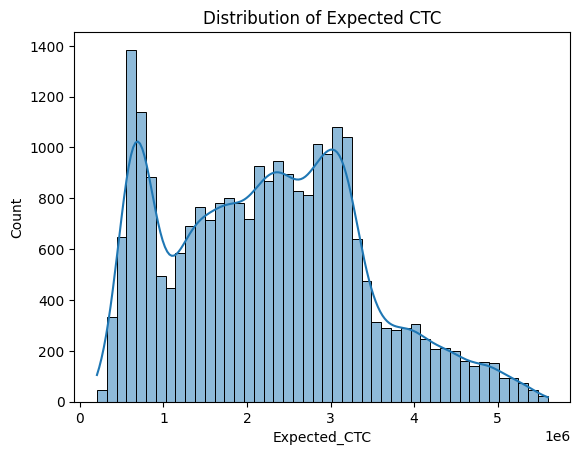

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Expected_CTC'], kde=True)
plt.title('Distribution of Expected CTC') #Shows a slight right skewness
plt.show()


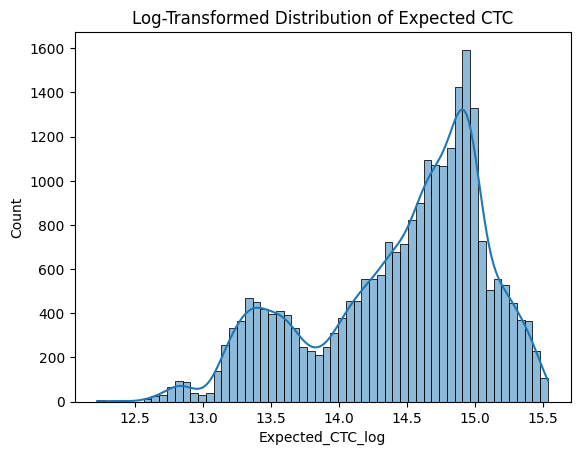

In [56]:
df['Expected_CTC_log'] = np.log1p(df['Expected_CTC'])
sns.histplot(df['Expected_CTC_log'], kde=True)
plt.title('Log-Transformed Distribution of Expected CTC')
plt.show()
#Close to Bell Shaped Curve

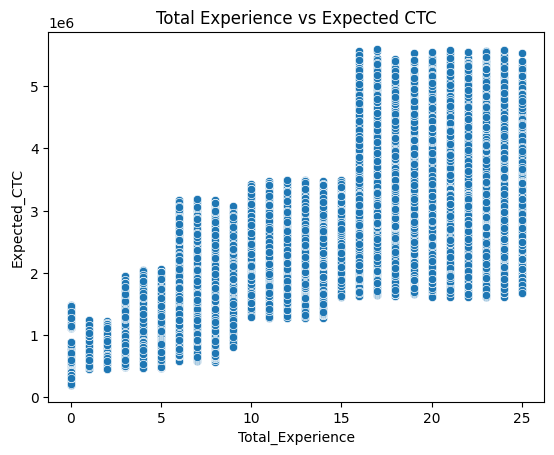

In [57]:
sns.scatterplot(data=df, x='Total_Experience', y='Expected_CTC')
plt.title("Total Experience vs Expected CTC") 
plt.show()
#Clearly shows a positive correlation(Total Experience increases, Expected CTC increases)


In [58]:
from sklearn.feature_selection import mutual_info_regression

x=df.drop(columns=['Expected_CTC', 'Expected_CTC_log'])
y=df['Expected_CTC_log']

x_encoded = pd.get_dummies(x, drop_first=True)  # Convert categorical variables to dummy variables
mi = mutual_info_regression(x_encoded , y)
mi_series=pd.Series(mi,index=x_encoded.columns).sort_values(ascending=False)

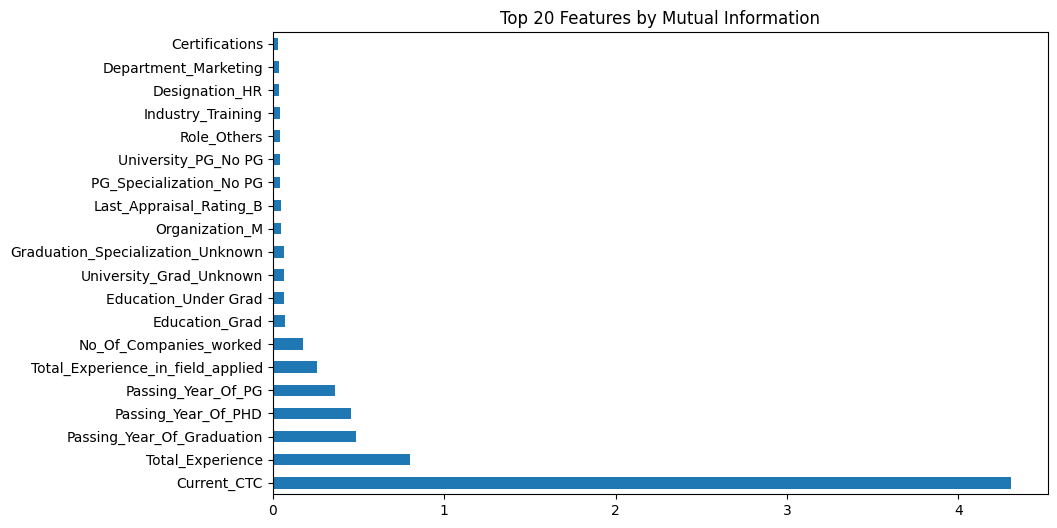

In [78]:
# Plot top 20
mi_series.head(20).plot(kind='barh', figsize=(10,6), title='Top 20 Features by Mutual Information')
plt.show()

In [79]:
#Storing all the features that has some relevance to the target
selected_features=mi_series[mi_series>0.01].index.tolist()

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total_Experience                   25000 non-null  int64  
 1   Total_Experience_in_field_applied  25000 non-null  int64  
 2   Department                         25000 non-null  object 
 3   Role                               25000 non-null  object 
 4   Industry                           25000 non-null  object 
 5   Organization                       25000 non-null  object 
 6   Designation                        25000 non-null  object 
 7   Education                          25000 non-null  object 
 8   Graduation_Specialization          25000 non-null  object 
 9   University_Grad                    25000 non-null  object 
 10  Passing_Year_Of_Graduation         25000 non-null  float64
 11  PG_Specialization                  25000 non-null  obj

In [81]:
x_encoded[selected_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Current_CTC                          25000 non-null  int64  
 1   Total_Experience                     25000 non-null  int64  
 2   Passing_Year_Of_Graduation           25000 non-null  float64
 3   Passing_Year_Of_PHD                  25000 non-null  float64
 4   Passing_Year_Of_PG                   25000 non-null  float64
 5   Total_Experience_in_field_applied    25000 non-null  int64  
 6   No_Of_Companies_worked               25000 non-null  int64  
 7   Education_Grad                       25000 non-null  bool   
 8   Education_Under Grad                 25000 non-null  bool   
 9   University_Grad_Unknown              25000 non-null  bool   
 10  Graduation_Specialization_Unknown    25000 non-null  bool   
 11  Organization_M              

In [102]:
X = x_encoded[selected_features]
y = df['Expected_CTC_log']

In [ ]:
num_cols = x_encoded[selected_features].select_dtypes(include=['int64', 'float64']).columns
from sklearn.preprocessing import StandardScaler

x_scaled = x_encoded[selected_features].copy()  

scaler = StandardScaler()
x_scaled[num_cols] = scaler.fit_transform(x_scaled[num_cols])


In [104]:
x_scaled[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
Current_CTC,25000.0,-1.058709e-16,1.00002,-1.913667,-0.797260,0.045232,0.742167,2.432908
Total_Experience,25000.0,-9.521273e-17,1.00002,-1.672154,-0.869076,-0.065997,0.870928,1.674007
Passing_Year_Of_Graduation,25000.0,-1.514167e-14,1.00002,-2.237449,-0.574512,-0.020199,0.672692,2.474207
Passing_Year_Of_PHD,25000.0,8.242296e-17,1.00002,-1.050794,-1.050794,0.940265,0.952236,0.964206
Passing_Year_Of_PG,25000.0,-7.545964e-17,1.00002,-1.499994,-1.499994,0.658896,0.671862,0.685909
Total_Experience_in_field_applied,25000.0,-8.952838e-17,1.00002,-1.075404,-0.903565,-0.216208,0.642988,3.220575
No_Of_Companies_worked,25000.0,-2.387424e-17,1.00002,-2.060012,-0.876791,-0.285180,0.898041,1.489652
Certifications,25000.0,-4.455103e-17,1.00002,-0.645043,-0.645043,-0.645043,0.188690,3.523623


In [105]:
x = x_scaled  # ready for Linear, Ridge, Lasso

x_tree = x_encoded[selected_features]  # raw values, including unscaled numerics , for rfregressor,xgboost

In [106]:
#Train-test split
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# For tree-based models (no scaling)
x_tree = x_encoded[selected_features]
x_train_tree, x_test_tree, _, _ = train_test_split(x_tree, y, test_size=0.2, random_state=42)

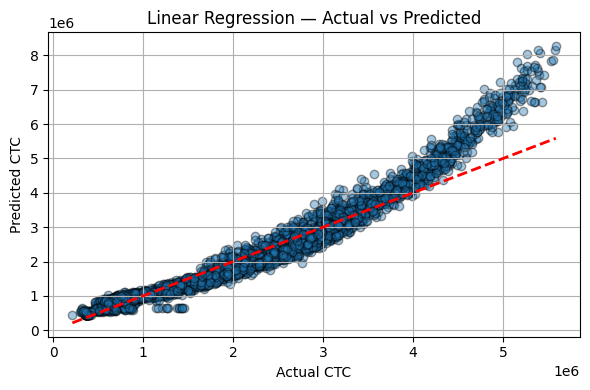

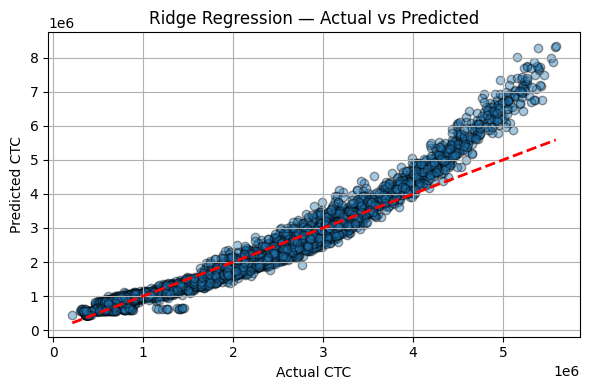

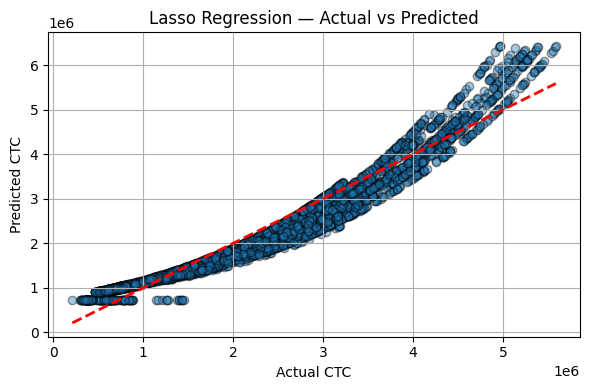

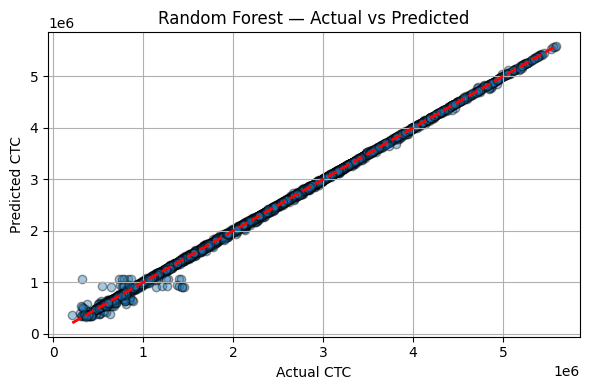

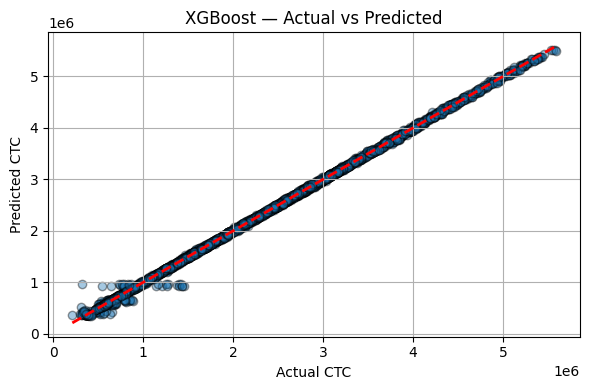

In [107]:
# Pre-transform once
y_test_exp = np.expm1(y_test)
y_train_exp = np.expm1(y_train)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
}

results = []

for name, model in models.items():
    if name in ['Random Forest', 'XGBoost']:
        model.fit(x_train_tree, y_train)
        y_pred_log = model.predict(x_test_tree)
    else:
        model.fit(x_train_scaled, y_train)
        y_pred_log = model.predict(x_test_scaled)

    y_pred = np.expm1(y_pred_log)
    
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test_exp, y_pred, alpha=0.4, edgecolors='k')
    plt.plot([y_test_exp.min(), y_test_exp.max()],[y_test_exp.min(), y_test_exp.max()], 'r--', lw=2)
    plt.xlabel("Actual CTC")
    plt.ylabel("Predicted CTC")
    plt.title(f"{name} — Actual vs Predicted")
    plt.grid(True) 
    plt.tight_layout()
    plt.show()

    mae = mean_absolute_error(y_test_exp, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_exp, y_pred))
    r2 = r2_score(y_test_exp, y_pred)

    results.append({
        'Model': name,
        'MAE (₹)': round(mae, 2),
        'RMSE (₹)': round(rmse, 2),
        'R² Score': round(r2, 4)
    })



In [92]:
results

[{'Model': 'Linear Regression',
  'MAE (₹)': 261948.35,
  'RMSE (₹)': np.float64(411619.32),
  'R² Score': 0.8747},
 {'Model': 'Ridge Regression',
  'MAE (₹)': 261531.98,
  'RMSE (₹)': np.float64(412338.45),
  'R² Score': 0.8743},
 {'Model': 'Lasso Regression',
  'MAE (₹)': 266201.69,
  'RMSE (₹)': np.float64(321488.82),
  'R² Score': 0.9236},
 {'Model': 'Random Forest',
  'MAE (₹)': 11234.78,
  'RMSE (₹)': np.float64(31825.62),
  'R² Score': 0.9993},
 {'Model': 'XGBoost',
  'MAE (₹)': 16044.57,
  'RMSE (₹)': np.float64(32957.19),
  'R² Score': 0.9992}]

In [93]:
results_df = pd.DataFrame(results).sort_values(by='R² Score', ascending=False,)
print(results_df)
#Random Forest is top Performer

               Model    MAE (₹)   RMSE (₹)  R² Score
3      Random Forest   11234.78   31825.62    0.9993
4            XGBoost   16044.57   32957.19    0.9992
2   Lasso Regression  266201.69  321488.82    0.9236
0  Linear Regression  261948.35  411619.32    0.8747
1   Ridge Regression  261531.98  412338.45    0.8743


In [ ]:
#Just checking if the Exp tranformation was successful
y_train = np.expm1(y_train)
print(y_train_exp.max(), y_pred.max(), y_test_exp.max())


5599570.000000002 5517826.0 5586046.000000004


In [108]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RandomForestRegressor(n_estimators=100, random_state=42),
                         x_train_tree, y_train, scoring='r2', cv=5)
print("Cross-Validated R² Scores:", scores)
print("Mean CV R² Score:", scores.mean())


Cross-Validated R² Scores: [0.9940976  0.99575156 0.99551962 0.99442942 0.99578727]
Mean CV R² Score: 0.9951170950109972


In [ ]:
# Picking the best model
best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(x_train_tree, y_train)

y_pred_log = best_model.predict(x_test_tree)

# Inverse transform log prediction to get actual CTC values
y_pred = np.expm1(y_pred_log)
y_actual = np.expm1(y_test)  


,Actual CTC (₹),Predicted CTC (₹),Difference (₹)
6868,3113073.0,3.113406e+06,333.018818
24016,1263089.0,1.259434e+06,3655.494328
9668,3638037.0,3.616643e+06,21394.024478
13640,2759980.0,2.762570e+06,2589.851998
14018,1040303.0,1.058301e+06,17997.589061
7488,2208350.0,2.195628e+06,12721.724266
5804,1281873.0,1.285775e+06,3901.816375
12909,2322435.0,2.320138e+06,2296.936477
3386,3219206.0,3.247684e+06,28477.937020
9567,650182.0,6.347539e+05,15428.083254


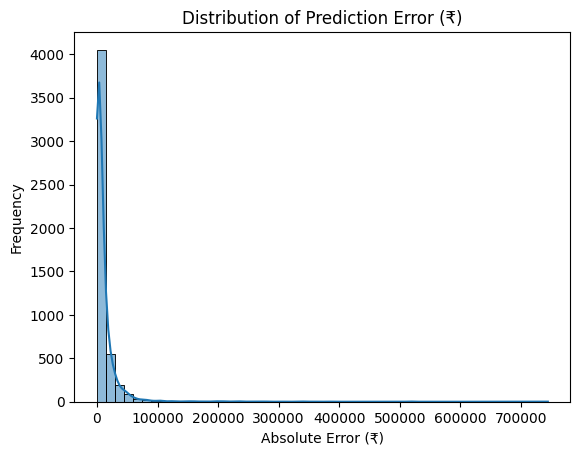

In [110]:
import seaborn as sns

sns.histplot(prediction_df["Difference (₹)"], bins=50, kde=True)
plt.title("Distribution of Prediction Error (₹)")
plt.xlabel("Absolute Error (₹)")
plt.ylabel("Frequency")
plt.show()


In [ ]:
top_errors = prediction_df.sort_values(by='Difference (₹)', ascending=False).head(10)
top_errors
#Presence of OUTLIERS

,Actual CTC (₹),Predicted CTC (₹),Difference (₹)
21735,324114.0,1.068543e+06,744428.755424
19893,1455845.0,9.107984e+05,545046.603333
10949,1429362.0,9.107984e+05,518563.603333
20194,1427724.0,9.107984e+05,516925.603333
18066,1400053.0,9.280960e+05,471957.017098
6210,1381150.0,9.493649e+05,431785.095791
3023,545536.0,9.280960e+05,382559.982902
9355,1425763.0,1.068543e+06,357220.244576
3942,728093.0,1.068543e+06,340449.755424
17244,1403734.0,1.068543e+06,335191.244576


In [124]:
#Filter out outliers from df based on Expected_CTC_log
Q1 = df['Expected_CTC_log'].quantile(0.25)
Q3 = df['Expected_CTC_log'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Create mask for filtering
outlier_mask = (df['Expected_CTC_log'] >= lower_bound) & (df['Expected_CTC_log'] <= upper_bound)

#Filter X and y
X_filtered = x_encoded.loc[outlier_mask, selected_features]
y_filtered = df.loc[outlier_mask, 'Expected_CTC_log']


X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

#Scaling numerical data
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


model=RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred_log=model.predict(X_test)
y_pred=np.expm1(y_pred_log)
y_actual=np.expm1(y_test)

mae=mean_absolute_error(y_actual, y_pred)
rmse=np.sqrt(mean_squared_error(y_actual, y_pred))
r2=r2_score(y_actual, y_pred)

# Results
print(f"\n Random Forest on Outlier-Removed Data")
print(f"MAE: ₹{mae:,.2f}")
print(f"RMSE: ₹{rmse:,.2f}")
print(f"R² Score: {r2:.4f}")



 Random Forest on Outlier-Removed Data
MAE: ₹10,657.43
RMSE: ₹28,427.79
R² Score: 0.9994


In [125]:
prediction_df=pd.DataFrame({
    'Actual CTC (₹)': y_actual,
    'Predicted CTC (₹)': y_pred,
    'Difference (₹)': abs(y_actual - y_pred)
})

# Show top 10 predictions
prediction_df.head(10)


,Actual CTC (₹),Predicted CTC (₹),Difference (₹)
7269,378161.0,3.810652e+05,2904.184362
23889,593990.0,5.550223e+05,38967.657580
17502,2079107.0,2.054274e+06,24833.029707
22585,2888142.0,2.892836e+06,4693.963320
12987,3585302.0,3.555416e+06,29886.040348
4482,3935916.0,3.944311e+06,8395.129631
21864,1600394.0,1.607490e+06,7096.055651
518,3092955.0,3.091127e+06,1827.609655
3361,566670.0,5.924194e+05,25749.352925
17825,2436569.0,2.437337e+06,767.648630


In [126]:
from sklearn.model_selection import RandomizedSearchCV

param_dist={
    'n_estimators':[100, 200, 300],
    'max_depth':[None, 10, 20, 30, 50],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4],
    'max_features':['sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=20, cv=5, scoring='neg_mean_absolute_error',
                                   random_state=42, n_jobs=-1, verbose=1)

random_search.fit(X_train, y_train)
print("Best parameters:", random_search.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


KeyboardInterrupt: 

In [127]:
#Filter out outliers from df based on Expected_CTC_log
Q1 = df['Expected_CTC_log'].quantile(0.25)
Q3 = df['Expected_CTC_log'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Create mask for filtering
outlier_mask = (df['Expected_CTC_log'] >= lower_bound) & (df['Expected_CTC_log'] <= upper_bound)

#Filter X and y
X_filtered = x_encoded.loc[outlier_mask, selected_features]
y_filtered = df.loc[outlier_mask, 'Expected_CTC_log']


X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

#Scaling numerical data
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


model=RandomForestRegressor(n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features='sqrt', max_depth=30)
model.fit(X_train, y_train)


y_pred_log=model.predict(X_test)
y_pred=np.expm1(y_pred_log)
y_actual=np.expm1(y_test)

mae=mean_absolute_error(y_actual, y_pred)
rmse=np.sqrt(mean_squared_error(y_actual, y_pred))
r2=r2_score(y_actual, y_pred)

# Results
print(f"\n Random Forest on Outlier-Removed Data")
print(f"MAE: ₹{mae:,.2f}")
print(f"RMSE: ₹{rmse:,.2f}")
print(f"R² Score: {r2:.4f}")



 Random Forest on Outlier-Removed Data
MAE: ₹78,856.18
RMSE: ₹118,960.72
R² Score: 0.9893
